<a href="https://colab.research.google.com/github/BitnooriLee/Applied-Machine-Learning/blob/main/Programming_Assignment5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Programming Assignment 5** 

Group PA5 28 Bitnoori Lee, Sena Bayraktaroglu


# **PART 1**

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

root = '/content/gdrive/My Drive/DAT340/'

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#from sklearn.model_selection import train_test_split

#testdata = pd.read_csv(root+"adult_test.csv")


Mounted at /content/gdrive


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

data_gen = ImageDataGenerator(rescale=1.0/255)

imgdir = root+'/a5_images' # or wherever you put them...
img_size = 64
batch_size = 32

train_generator = data_gen.flow_from_directory(
        imgdir + '/train',
        target_size=(img_size, img_size),
        batch_size=batch_size,
        class_mode='binary',
        classes=['other', 'car'],
        seed=12345,
        shuffle=True)

valid_generator = data_gen.flow_from_directory(
        imgdir + '/validation',
        target_size=(img_size, img_size),
        batch_size=batch_size,
        class_mode='binary',
        classes=['other', 'car'],
        seed=12345,
        shuffle=True)

Xbatch, Ybatch = train_generator.next()



Found 1600 images belonging to 2 classes.
Found 576 images belonging to 2 classes.


In this part while loading images, images' pixel values mapped between 0 and 1. Also image sizes are reshaped to 64,64.

(32, 64, 64, 3)
1.0


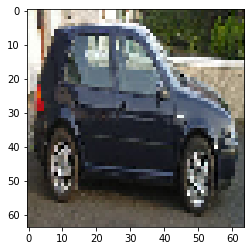

In [ ]:
print(Xbatch.shape)
print(Ybatch[4])
from matplotlib import pyplot as plt
plt.imshow(Xbatch[4]);

**Figure 1.** Displays an image from dataset.

In [ ]:

import tensorflow.keras as keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential

#**PART 1**
CNN

In [ ]:

def make_convnet():
  #num_classes = 2
  model = Sequential()
  model.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1),
                  activation='relu',
                  input_shape=(img_size , img_size , 3)))
  model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
  model.add(Conv2D(64, (5, 5), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Flatten())
  model.add(Dense(128, activation='relu'))
  model.add(Dense(1, activation='sigmoid'))
  return model


Our model consists 7 layers. First two layers conv filter and max pooling then next two are same. Output of the fourth layer is flattened and then 1 dense layer applied to reach output layer. As an input size to our model we gave (64,64,3) and output size is 1. 

In [ ]:
model = make_convnet()

In [ ]:

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history =model.fit(train_generator,epochs=20,validation_data=valid_generator)

Epoch 1/20
50/50 [==============================] - 401s 8s/step - loss: 0.6894 - accuracy: 0.5713 - val_loss: 0.6514 - val_accuracy: 0.6198
Epoch 2/20
50/50 [==============================] - 9s 172ms/step - loss: 0.6087 - accuracy: 0.6825 - val_loss: 0.6137 - val_accuracy: 0.6528
Epoch 3/20
50/50 [==============================] - 9s 171ms/step - loss: 0.5317 - accuracy: 0.7544 - val_loss: 0.5370 - val_accuracy: 0.7569
Epoch 4/20
50/50 [==============================] - 9s 172ms/step - loss: 0.4458 - accuracy: 0.7981 - val_loss: 0.5223 - val_accuracy: 0.7708
Epoch 5/20
50/50 [==============================] - 9s 173ms/step - loss: 0.3774 - accuracy: 0.8363 - val_loss: 0.5162 - val_accuracy: 0.7639
Epoch 6/20
50/50 [==============================] - 9s 172ms/step - loss: 0.3112 - accuracy: 0.8675 - val_loss: 0.7987 - val_accuracy: 0.6979
Epoch 7/20
50/50 [==============================] - 9s 185ms/step - loss: 0.2984 - accuracy: 0.8719 - val_loss: 0.6845 - val_accuracy: 0.7431
Epoch 8

For accuracy we choose binary cross entropy because it is a classification problem and for optimizer we used stochastic gradient descent. 

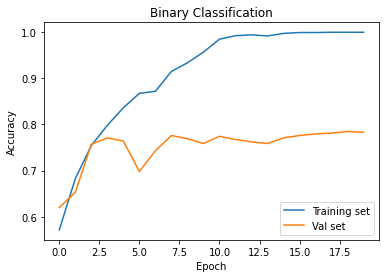

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Binary Classification')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training set', 'Val set'], loc='lower right')
plt.show()

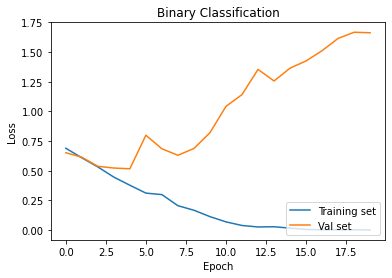

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Binary Classification')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training set', 'Val set'], loc='lower right')
plt.show()

**COMMENT :** Dummy accuracy we had was 0.50 so since accuracy is higher than this we can state that our model works. Also in loss and accuracy graphs we can see that values are converging. What can be seen in the training and validation accuracy plot above, the accuracy is greatly improved in the first 3 epochs and slowly converged as the number of epochs increases. We can assume that an even higher number of epochs can improve the accuracy however, it would not that significant.

#**PART 2**

In [ ]:
train_datagen_augmentation = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        rotation_range=90,
        horizontal_flip=True)
train_generator_augmented = train_datagen_augmentation.flow_from_directory(
        imgdir + '/train',
        target_size=(img_size, img_size),
        batch_size=batch_size,
        class_mode='binary',
        classes=['other', 'car'],
        seed=12345,
        shuffle=True)

Found 1600 images belonging to 2 classes.


In [ ]:
model = make_convnet()

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(train_generator_augmented ,epochs=20,validation_data=valid_generator)

Epoch 1/20
50/50 [==============================] - 12s 222ms/step - loss: 0.6680 - accuracy: 0.6194 - val_loss: 0.6723 - val_accuracy: 0.6059
Epoch 2/20
50/50 [==============================] - 11s 212ms/step - loss: 0.6369 - accuracy: 0.6569 - val_loss: 0.6362 - val_accuracy: 0.6163
Epoch 3/20
50/50 [==============================] - 11s 215ms/step - loss: 0.5926 - accuracy: 0.6956 - val_loss: 0.7879 - val_accuracy: 0.6059
Epoch 4/20
50/50 [==============================] - 11s 221ms/step - loss: 0.5906 - accuracy: 0.6988 - val_loss: 0.5724 - val_accuracy: 0.7014
Epoch 5/20
50/50 [==============================] - 11s 220ms/step - loss: 0.5538 - accuracy: 0.7119 - val_loss: 0.5731 - val_accuracy: 0.7240
Epoch 6/20
50/50 [==============================] - 11s 215ms/step - loss: 0.5573 - accuracy: 0.7106 - val_loss: 0.5515 - val_accuracy: 0.7170
Epoch 7/20
50/50 [==============================] - 11s 216ms/step - loss: 0.5529 - accuracy: 0.7275 - val_loss: 0.5911 - val_accuracy: 0.7014

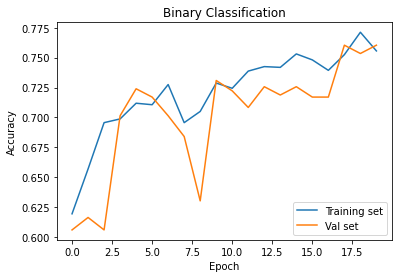

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Binary Classification')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training set', 'Val set'], loc='lower right')
plt.show()

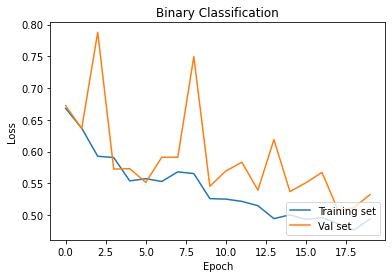

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Binary Classification')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training set', 'Val set'], loc='lower right')
plt.show()

rotation decreased

Found 1600 images belonging to 2 classes.
Epoch 1/20
50/50 [==============================] - 12s 221ms/step - loss: 0.7053 - accuracy: 0.5750 - val_loss: 0.6567 - val_accuracy: 0.6198
Epoch 2/20
50/50 [==============================] - 11s 214ms/step - loss: 0.6008 - accuracy: 0.6762 - val_loss: 0.5659 - val_accuracy: 0.7170
Epoch 3/20
50/50 [==============================] - 11s 215ms/step - loss: 0.5713 - accuracy: 0.7125 - val_loss: 0.5476 - val_accuracy: 0.7413
Epoch 4/20
50/50 [==============================] - 11s 218ms/step - loss: 0.5464 - accuracy: 0.7331 - val_loss: 0.5628 - val_accuracy: 0.7222
Epoch 5/20
50/50 [==============================] - 11s 218ms/step - loss: 0.5076 - accuracy: 0.7481 - val_loss: 0.5251 - val_accuracy: 0.7483
Epoch 6/20
50/50 [==============================] - 11s 217ms/step - loss: 0.4984 - accuracy: 0.7656 - val_loss: 0.5282 - val_accuracy: 0.7604
Epoch 7/20
50/50 [==============================] - 11s 217ms/step - loss: 0.5083 - accuracy: 0.7600

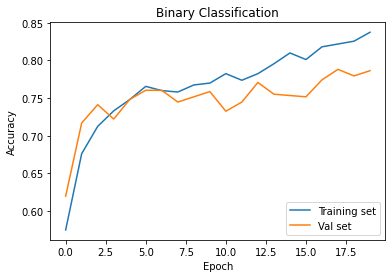

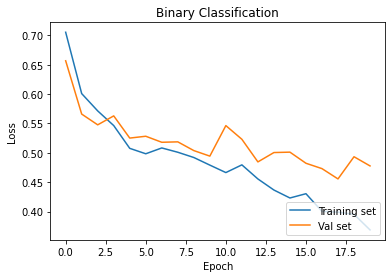

In [ ]:
train_datagen_augmentation = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        rotation_range=30,
        horizontal_flip=True)
train_generator_augmented = train_datagen_augmentation.flow_from_directory(
        imgdir + '/train',
        target_size=(img_size, img_size),
        batch_size=batch_size,
        class_mode='binary',
        classes=['other', 'car'],
        seed=12345,
        shuffle=True)
model = make_convnet()

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(train_generator_augmented ,epochs=20,validation_data=valid_generator)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Binary Classification')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training set', 'Val set'], loc='lower right')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Binary Classification')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training set', 'Val set'], loc='lower right')
plt.show()

Rotation deleted, zoom decreased 

Found 1600 images belonging to 2 classes.
Epoch 1/20
50/50 [==============================] - 12s 220ms/step - loss: 0.6734 - accuracy: 0.5888 - val_loss: 0.6356 - val_accuracy: 0.6562
Epoch 2/20
50/50 [==============================] - 11s 212ms/step - loss: 0.6102 - accuracy: 0.6656 - val_loss: 0.5485 - val_accuracy: 0.7344
Epoch 3/20
50/50 [==============================] - 11s 215ms/step - loss: 0.5141 - accuracy: 0.7456 - val_loss: 0.5260 - val_accuracy: 0.7465
Epoch 4/20
50/50 [==============================] - 11s 224ms/step - loss: 0.4900 - accuracy: 0.7756 - val_loss: 0.5582 - val_accuracy: 0.7413
Epoch 5/20
50/50 [==============================] - 11s 215ms/step - loss: 0.4436 - accuracy: 0.7987 - val_loss: 0.5282 - val_accuracy: 0.7413
Epoch 6/20
50/50 [==============================] - 11s 217ms/step - loss: 0.4421 - accuracy: 0.8081 - val_loss: 0.4913 - val_accuracy: 0.7622
Epoch 7/20
50/50 [==============================] - 11s 214ms/step - loss: 0.4158 - accuracy: 0.8144

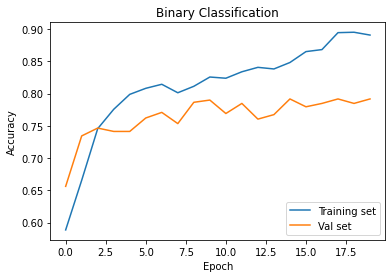

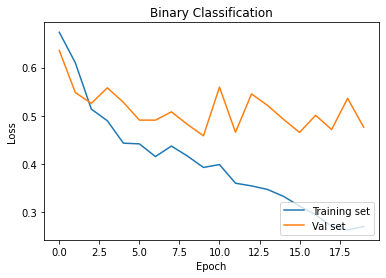

In [ ]:
train_datagen_augmentation = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.3,
        horizontal_flip=True)
train_generator_augmented = train_datagen_augmentation.flow_from_directory(
        imgdir + '/train',
        target_size=(img_size, img_size),
        batch_size=batch_size,
        class_mode='binary',
        classes=['other', 'car'],
        seed=12345,
        shuffle=True)
model = make_convnet()

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(train_generator_augmented ,epochs=20,validation_data=valid_generator)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Binary Classification')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training set', 'Val set'], loc='lower right')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Binary Classification')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training set', 'Val set'], loc='lower right')
plt.show()

When we make data augmentation, if we compare graphs we can see that overfitting is avoided. Training accuracy and validation accuracy increased at same pace. 

PRETRAINED NETWORK

In [ ]:
from tensorflow.keras import applications
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.vgg16 import decode_predictions, preprocess_input

vggmodel = applications.VGG16(weights='imagenet', include_top=True)

553476096/553467096 [==============================] - 5s 0us/step


49152/35363 [=========================================] - 0s 0us/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[('n02701002', 'ambulance', 0.26921147), ('n03977966', 'police_van', 0.2271578), ('n03769881', 'minibus', 0.12748232), ('n03796401', 'moving_van', 0.11873201), ('n04065272', 'recreational_vehicle', 0.1181894)]]


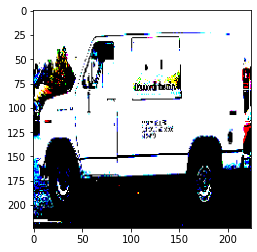

In [ ]:
path_to_image = imgdir + '/validation/' + "02.jpg"
image_object = load_img("/content/gdrive/My Drive/DAT340/a5_images/validation/car/0229.jpg", target_size=(224,224))
img_array = img_to_array(image_object) 
processed_image = preprocess_input(img_array)
processed_image = processed_image.reshape(1,224,224,3)
prob_array = vggmodel.predict(processed_image)
print(decode_predictions(prob_array))
from matplotlib import pyplot as plt
plt.imshow(img_array)

**COMMENT :** Predictions make sense because first one is ambulance and the car in image looks like an ambulance and it also looks like police van too. However their colors are different from an ambulance or police van. But it also depends colors of ambulance in dataset.  

TRANSFER LEARNING 

In [ ]:


def create_vgg16_features(from_file,to_file):
  img_size = 224
  feature_extractor = applications.VGG16(include_top=False, weights='imagenet',
                                        input_shape=(img_size, img_size, 3))
  vgg_data_gen = ImageDataGenerator(preprocessing_function=preprocess_input)
  train_generator_transfer = vgg_data_gen.flow_from_directory(
          from_file,
          target_size=(img_size, img_size),
          batch_size=batch_size,
          class_mode='binary',
          classes=['other', 'car'],
          seed=12345,
          shuffle=False)
  cnn_features = feature_extractor.predict(train_generator_transfer)
  with open(to_file, 'wb') as f:

    np.save(f, cnn_features)


In [ ]:
from_file = imgdir + '/validation'
to_file = root + "valid_features"
create_vgg16_features(from_file,to_file)

from_file = imgdir + '/train'
to_file = root + "train_features"
create_vgg16_features(from_file,to_file)

Found 576 images belonging to 2 classes.
Found 1600 images belonging to 2 classes.


Epoch 1/10
50/50 [==============================] - 1s 21ms/step - loss: 7.9379 - accuracy: 0.8469 - val_loss: 0.3292 - val_accuracy: 0.9010
Epoch 2/10
50/50 [==============================] - 1s 19ms/step - loss: 0.1015 - accuracy: 0.9675 - val_loss: 0.2301 - val_accuracy: 0.9306
Epoch 3/10
50/50 [==============================] - 1s 19ms/step - loss: 0.0290 - accuracy: 0.9906 - val_loss: 0.2261 - val_accuracy: 0.9358
Epoch 4/10
50/50 [==============================] - 1s 19ms/step - loss: 0.0095 - accuracy: 0.9994 - val_loss: 0.2479 - val_accuracy: 0.9392
Epoch 5/10
50/50 [==============================] - 1s 18ms/step - loss: 0.0046 - accuracy: 1.0000 - val_loss: 0.2574 - val_accuracy: 0.9410
Epoch 6/10
50/50 [==============================] - 1s 18ms/step - loss: 0.0029 - accuracy: 0.9994 - val_loss: 0.2632 - val_accuracy: 0.9427
Epoch 7/10
50/50 [==============================] - 1s 18ms/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 0.2722 - val_accuracy: 0.9427
Epoch 8/10
50

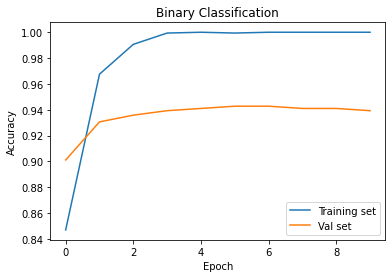

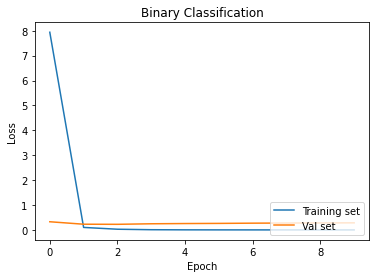

In [ ]:
import tensorflow.keras as keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential

path_train_features = root + "train_features"
path_valid_features =   root + "valid_features"
def train_on_cnnfeatures(path_train_features,path_valid_features):  
  with open(path_train_features, 'rb') as f:
      the_data_train = np.load(f)
  with open(path_valid_features, 'rb') as f:
      the_data_valid = np.load(f)

  model = Sequential()
  model.add(Flatten())
  model.add(Dense(128, activation='relu'))
  model.add(Dense(1, activation='sigmoid'))



  def get_labels(n):
      return np.array([0]*(n//2) + [1]*(n//2))
  y_train = get_labels(1600)  
  y_valid =  get_labels(576)  
  model.compile(loss='binary_crossentropy',
                optimizer='sgd',
                metrics=['accuracy'])
  history =model.fit(the_data_train,y_train,epochs=10,validation_data=(the_data_valid,y_valid))
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('Binary Classification')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Training set', 'Val set'], loc='lower right')
  plt.show()
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('Binary Classification')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Training set', 'Val set'], loc='lower right')
  plt.show()
train_on_cnnfeatures(path_train_features,path_valid_features)

**COMMENT** : It is better than our cnn because this new model is built up on a trained VGG-16 network which is trained over 14 million images and it has more additional layers than we had for the previous models. Also weights for network is more optimal than our model since more images used in training stage.  

# Visualize Learned Features

In [ ]:
first_layer_weights = feature_extractor.get_weights()[0]
first_layer_weights.shape

(3, 3, 3, 64)

In [ ]:
def kernel_image(weights, i, positive):
    
    # extract the convolutional kernel at position i
    k = weights[:,:,:,i].copy()
    if not positive:
        k = -k
    
    # clip the values: if we're looking for positive
    # values, just keep the positive part; vice versa
    # for the negative values.
    k *= k > 0

    # rescale the colors, to make the images less dark
    m = k.max()
    if m > 1e-3:
        k /= m 

    return k

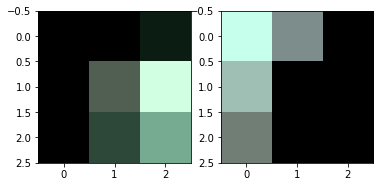

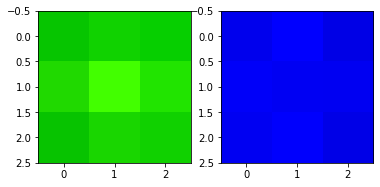

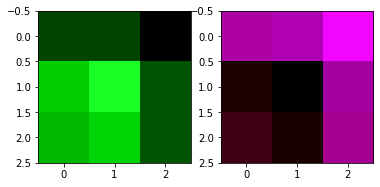

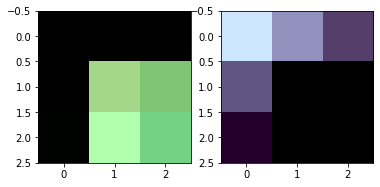

In [ ]:

image_temp1 = kernel_image(first_layer_weights, 60, positive=True)
image_temp2 = kernel_image(first_layer_weights, 60, positive=False)
from matplotlib import pyplot as plt
plt.subplot(1, 2, 1)
plt.imshow(image_temp1)
plt.subplot(1, 2, 2)
plt.imshow(image_temp2)
plt.show()
image_temp1 = kernel_image(first_layer_weights, 50, positive=True)
image_temp2 = kernel_image(first_layer_weights, 50, positive=False)

plt.subplot(1, 2, 1)
plt.imshow(image_temp1)
plt.subplot(1, 2, 2)
plt.imshow(image_temp2)
plt.show()
image_temp1 = kernel_image(first_layer_weights, 40, positive=True)
image_temp2 = kernel_image(first_layer_weights, 40, positive=False)

plt.subplot(1, 2, 1)
plt.imshow(image_temp1)
plt.subplot(1, 2, 2)
plt.imshow(image_temp2)
plt.show()
image_temp1 = kernel_image(first_layer_weights, 30, positive=True)
image_temp2 = kernel_image(first_layer_weights, 30, positive=False)

plt.subplot(1, 2, 1)
plt.imshow(image_temp1)
plt.subplot(1, 2, 2)
plt.imshow(image_temp2)

In this conv layer plots we can see varying weights, if weights are larger they are darker and if weights smaller ,they are lighter. 